# SMD Übungszettel Nr.3

__Abagbe von: Pape, Kusurmann, Becker__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize 
from joblib import Parallel, delayed
import collections

np.random.seed(8)

## Aufgabe 8

In [2]:
def neumann_random(random_numbers_x, random_numbers_y, real_x_values, real_y_values):
    good_number = []
    for i in range(len(real_x_values)):
        possible_u_1_index = np.abs(random_numbers_x - real_x_values[i]) < 1e-3
        possible_u_2_index = random_numbers_y < real_y_values[i]
        valid_numbers = random_numbers_x[(possible_u_1_index == True) & (possible_u_2_index == True)]
       
        good_number.extend(valid_numbers.tolist())

    return np.array(good_number) 

In [3]:
def neumann_random_new(random_x, random_y, number_of_numbers, xmin, xmax, function):
    random_numbers = random_x[random_y <= function(random_x)]
    if len(random_numbers) < number_of_numbers:
        more_random_numbers = []
        garbage_counter = 0
        while len(more_random_numbers) + len(random_numbers) < number_of_numbers:
            xnumber = np.random.uniform(xmin, xmax)
            if len(random_x[random_x == xnumber] != 0):
                print('Doppel Ziehung')
            else:
                ynumber = np.random.uniform()
                if ynumber <= function(xnumber):
                    more_random_numbers.append(xnumber)
                else:
                    garbage_counter += 1
        return np.append(random_numbers, np.array(more_random_numbers)), garbage_counter        
    else:
        return random_numbers, 0 

In [4]:
def planck_distribution(x):
    return 15/np.pi**4 * (x**3) / (np.exp(x) - 1)

Bestimmte Maximum der Planckverteilung:

$$\begin{aligned}
f(x)&=N\frac{x^3}{\exp(x)-1}\\
f'(x)&=N\left(\frac{3x^2(\exp(x)-1)-x^3\exp(x)}{\left(\exp(x)-1\right)^2}\right)\overset{!}{=}0\\
\Rightarrow \quad h(x)&:=\exp(x)(3-x)-3=0
\end{aligned}$$
Verwende die Funktion `brentq`, um die Nullstellen der Funktion $g(x)$ zu bestimmen.

In [5]:
def h(x):
    return np.exp(x) * (3 - x) - 3

In [6]:
xmax_planck =  scipy.optimize.brentq(h, 2, 10)
max_planck = planck_distribution(xmax_planck)
print('Maximum der Planck Verteilung', max_planck)

Maximum der Planck Verteilung 0.21888647009110665


/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


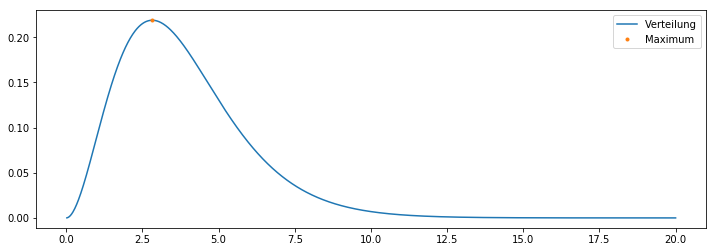

In [7]:
x = np.linspace(0, 20, 1000);
plt.figure(figsize = [12, 4]);
plt.plot(x, planck_distribution(x), label='Verteilung');
plt.plot(xmax_planck, max_planck, '.', label='Maximum');
plt.legend();

Deutlich zu erkennen ist, dass die bestimmte Nullstelle der Funktion $g(x)$ den Maximalwert 
der Planck Verteilung erzeugt.

Eigenschaften der Verteilung:

In [8]:
number_of_numbers = 100000
x_cutoff = 20

In [9]:
x = np.linspace(0, x_cutoff, number_of_numbers/50)

xrandom = np.random.uniform(0, x_cutoff, size=number_of_numbers)
yrandom = np.random.uniform(0, max_planck+1, size=number_of_numbers)
print(len(yrandom))

100000


/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [10]:
planck_random = neumann_random(xrandom, yrandom, x, planck_distribution(x));

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


<Figure size 432x288 with 0 Axes>

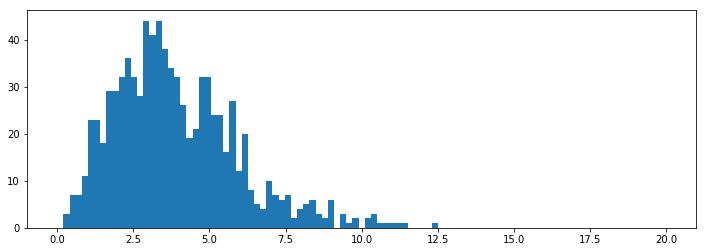

In [11]:
plt.clf()
plt.figure(figsize = [12, 4]);
plt.hist(planck_random, bins=np.linspace(0, x_cutoff, 5 * x_cutoff));

In [12]:
test, garbage_old = neumann_random_new(xrandom, yrandom, 100000, 0, x_cutoff, planck_distribution)

#plt.hist(neumann_random_new(xrandom, yrandom, 10, planck_distribution), bins=np.linspace(0, x_cutoff, 5 * x_cutoff));

In [13]:
print(garbage_old)

1817268


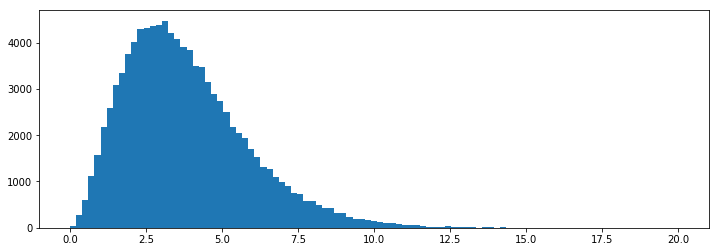

In [14]:
plt.figure(figsize = [12, 4]);
plt.hist(test, np.linspace(0, x_cutoff, 5 * x_cutoff));

### Aufgabenteil b)
Bestimme zunächst den Schnittpunkt der beiden Teilfunktion von $g(x)$:

$$\begin{aligned}
y_\mathrm{max}&=200Nx^{-0.1}\exp(-x^{0,9})\\
0&=200Nx^{-0.1}\exp(-x^{0,9})-y_\mathrm{max}=:t(x)
\end{aligned}$$

Verwende wieder wie oben die Funktion `brentq`, um die Nullstelle zu bestimmen.

In [15]:
def t(x):
    ymax = 0.21888647009110665
    return 200 * 15/np.pi**4 * x**(-0.1) * np.exp(-x**(0.9)) - ymax

In [16]:
x_s = scipy.optimize.brentq(t, 2, 10)
print('x_s liegt bei',x_s)

x_s liegt bei 5.678208598337558


/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<Figure size 432x288 with 0 Axes>

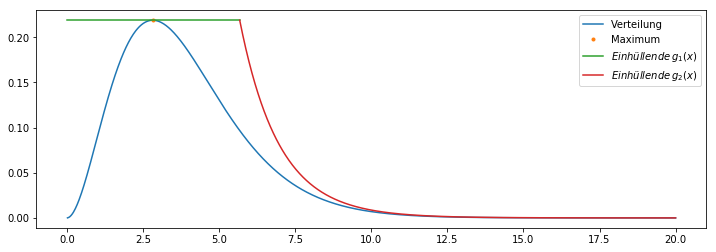

In [17]:
plt.clf()
plt.figure(figsize = [12, 4]);

x = np.linspace(0, 20, 1000);
x_lower = np.linspace(0, x_s, 1000)
x_upper = np.linspace(x_s, x_cutoff, 1000)


plt.plot(x, planck_distribution(x), label='Verteilung');
plt.plot(xmax_planck, max_planck, '.', label='Maximum');
plt.plot(x_lower, np.ones(len(x_lower)) * max_planck, '-', label=r'$Einhüllende \, g_1(x)$');
plt.plot(x_upper, t(x_upper) + max_planck, '-', label=r'$Einhüllende\, g_2(x)$');

plt.legend();

Bestimmte die Transformationsvorschrift, um die gleichverteilten Zufallszahlen in 
$g_2(x)=200Nx^{-0.1}\exp\left(-x^{0.9}\right)$ zu transformieren.Bestimme zunächst die Normierung:

$$\begin{aligned}
1&=\int_{x_s}^{x_ {cutoff}} 200Nx^{-0.1}\exp\left(-x^{0.9}\right)\mathrm{d}x\\
\Leftrightarrow \quad N&=\frac{-9}{2000}\left(\exp\left(-x_{cutoff}^{0.9}\right)-\exp\left(-x_s^{0.9}\right)\right)^{-1}
\end{aligned}$$

Nun die Transformationsvorschrift
$$\begin{aligned}
F(x)&=\frac{2000N}{9}\int_{x_s}^{x} x'^{-0.1}\exp\left(-x'^{0.9}\right)\mathrm{d}x\\
&=-\frac{2000N}{9}\left[\exp\left(-x^{0.9}\right)-\exp\left(-x_s'^{0.9}\right)\right]\overset{!}{=}u\\
\Leftrightarrow \quad T(u):= x &= \left(-\ln\left(\frac{-9u}{2000N}+\exp\left(-x_s^{0.9}\right)\right)\right)^\frac{10}{9}
\end{aligned}$$

In [18]:
def T(u, x_s = 5.678208598337558, x_cutoff = 20):
    N_new = -9/(2000) /(np.exp(-x_cutoff**(0.9))-np.exp(-x_s**(0.9)))
    return (-np.log(-9*u / (2000*N_new) + np.exp(-x_s**(0.9))) )**(10/9)

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


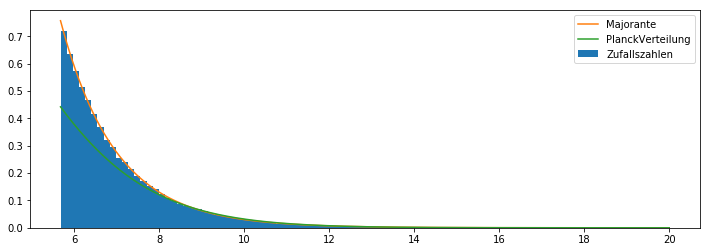

In [32]:
plt.figure(figsize = [12, 4]);
test = np.linspace(x_s, x_cutoff, 2000)
#xrandom_g2 = T(randomnumbers)
plt.hist(xrandom_g2, bins=np.linspace(x_s, x_cutoff, 100), normed=True, label ='Zufallszahlen');
plt.plot(test, majoranten_function_g2(test), label='Majorante')
plt.plot(test, planck_distribution(test)/max_planck, label='PlanckVerteilung');
plt.legend()


/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(8, 20)

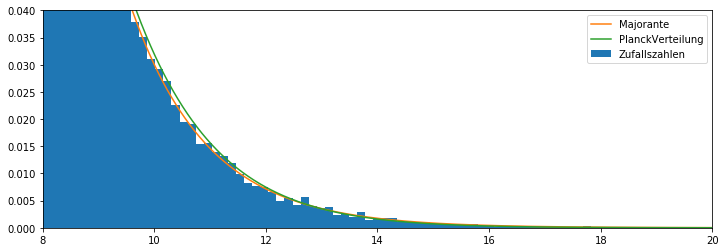

In [39]:
plt.figure(figsize = [12, 4]);
test = np.linspace(x_s, x_cutoff, 20000)
plt.hist(xrandom_g2, bins=np.linspace(x_s, x_cutoff, 100), normed=True, label ='Zufallszahlen');
plt.plot(test, majoranten_function_g2(test), label='Majorante')
plt.plot(test, planck_distribution(test)/max_planck, label='PlanckVerteilung');
plt.legend()
plt.ylim(0,0.04)
plt.xlim(8, x_cutoff)

Die Transformation besitzt die Form einer Planck Verteilung. Jedoch ist deutlich zu erkennen, dass im Bereich von $x\,\tilde{\in}\left[9,13\right]$ die Majorante **keine** Majorante ist.

In [22]:
def neumann_majoranten(random_x, random_y, number_of_numbers, majoranten_intervall, majoranten_function, function):
    random_numbers = random_x[random_y <= function(random_x)]
    more_random_numbers = []
    intervall = []
    x_transformed_list=[]
    if len(random_numbers) < number_of_numbers:
        garbage_counter = 0
        
        while len(more_random_numbers) + len(random_numbers) < number_of_numbers:
            # majoranten_intervall is a list of tupels
            xintervall = np.random.uniform(majoranten_intervall[0][0], majoranten_intervall[-1][-1])*0.0867    
            
           
            for intervall_number in range(len(majoranten_intervall)):
                 # check in wich intervall xintervall belongs
                if xintervall <= majoranten_intervall[intervall_number][-1]:
                    intervall.append(intervall_number)
                    # check if intervall has a majorant function
                    if majoranten_function[intervall_number][0]!= None:
                        # transform a uniform x with calculated transformation function
                        x_transformed = majoranten_function[intervall_number][0](np.random.uniform())
                        x_transformed_list.append(x_transformed)
                        #check if x_transformed already exists in random_x
                        if len(random_x[random_x == x_transformed])!= 0:
                            print('Doppel Ziehung')
                        else:
                            y_random = np.random.uniform()
                            
                            #print(y_random * majoranten_function[intervall_number][1](x_transformed), function(x_transformed))
                            # accept x_transformed as random number, if the condition from the lecture is True
                            if y_random * majoranten_function[intervall_number][1](x_transformed) < function(x_transformed):
                                #print('Akzeptiert')
                                more_random_numbers.append(x_transformed)
                            else:
                                #print('Rejected')
                                garbage_counter += 1
                    else:
                        xnumber = np.random.uniform(majoranten_intervall[intervall_number][0], majoranten_intervall[intervall_number][-1])
                        # If the intervall does not have any majorantfunction, just do normal rejection sampling
                        if len(random_x[random_x == xnumber]) != 0:
                            print('Doppel Ziehung')
                        else:
                            ynumber = np.random.uniform()
                            if ynumber <= function(xnumber):
                                more_random_numbers.append(xnumber)
                            else:
                                garbage_counter += 1      
                else:
                    pass 
        return np.append(random_numbers, np.array(more_random_numbers)), garbage_counter, np.array(intervall), np.array(x_transformed_list)
    else:
        return np.append(random_numbers, np.array(more_random_numbers)), 0

In [23]:
def majoranten_function_g2(x):
    N_new = -9/(2000) /(np.exp(-x_cutoff**(0.9))-np.exp(-x_s**(0.9)))
    return 200 * N_new * x**(-0.1) * np.exp(-x**(0.9))

In [26]:
xrandom_g2 = T(randomnumbers)
yrandom_g2 = t(xrandom_g2)

# Created intervalls, which I can use in neumann_majoranten function
majoranten_intervall = [(0, x_s), (x_s, x_cutoff)]
# Each Intervall owns a transformation function, T and a majoranten function. If it have a constant majorante
# I choosed the argument None, at will do normal rejection sampling

majoranten_function = [(None, None), (T, majoranten_function_g2)]


test, garbage, intervall, xtransformed = neumann_majoranten(np.array([1]), np.array([1]), 10000, majoranten_intervall, majoranten_function, planck_distribution)

10000 52830
[(5.807032283827514, 1)]


/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00099 , 0.00792 , 0.0198  , 0.026235, 0.04752 , 0.04752 ,
        0.07623 , 0.07821 , 0.105435, 0.107415, 0.12177 , 0.111375,
        0.120285, 0.124245, 0.1188  , 0.13167 , 0.12573 , 0.103455,
        0.11682 , 0.11187 , 0.094545, 0.09999 , 0.09504 , 0.080685,
        0.064845, 0.065835, 0.06732 , 0.055935, 0.266805, 0.268785,
        0.22671 , 0.219285, 0.197505, 0.175725, 0.15444 , 0.144045,
        0.116325, 0.11187 , 0.09207 , 0.079695, 0.07821 , 0.05841 ,
        0.065835, 0.04851 , 0.037125, 0.042075, 0.031185, 0.025245,
        0.02673 , 0.019305, 0.01782 , 0.01386 , 0.01584 , 0.01386 ,
        0.012375, 0.00792 , 0.00792 , 0.00396 , 0.00495 , 0.004455,
        0.00693 , 0.00396 , 0.005445, 0.001485, 0.001485, 0.001485,
        0.00099 , 0.      , 0.001485, 0.      , 0.00099 , 0.00198 ,
        0.000495, 0.001485, 0.000495, 0.00198 , 0.      , 0.      ,
        0.000495, 0.      , 0.      , 0.000495, 0.      , 0.000495,
        0.      , 0.000495, 0.      , 0.      , 

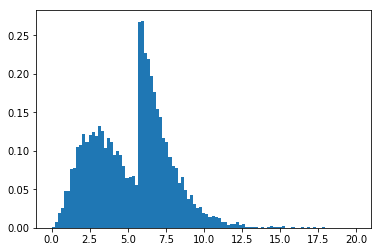

In [27]:
print(len(test), garbage)
print(collections.Counter(test).most_common(1))
plt.hist(test, bins=np.linspace(0, x_cutoff, 100), normed=True)

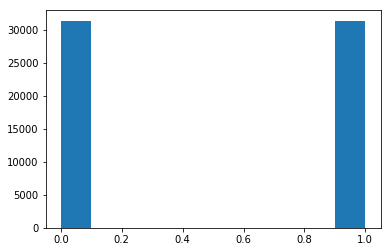

In [28]:
plt.hist(intervall);

In [ ]:
x = np.linspace(0.001, x_s)
sum_lower = sum(planck_distribution(x))

x= np.linspace(x_s, x_cutoff)
sum_upper = sum(planck_distribution(x))


sum_upper/sum_lower

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


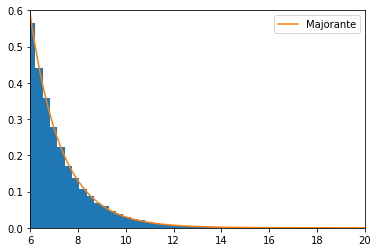

In [29]:
x = np.linspace(5, 20, 100)
xnorm = np.linspace(0,1, 100)
plt.hist(xtransformed, bins=np.linspace(5,20,50),normed=True);
#plt.plot(x, planck_distribution(x), label='Planck')
#plt.plot(xnorm, T(xnorm), label ='Majorante')
plt.plot(x, majoranten_function_g2(x), label='Majorante')
plt.axvline(x_s)
plt.ylim(0, 0.6)
plt.xlim(6,20)
plt.legend()

Es ergibt sich die Form der Planck Verteilung, jedoch ist die Verteilung nicht stetig. 
Es werden zu viele Zahlen im Intervall $x>x_S$ akzeptiert.

In [30]:
x_1 = np.linspace(0, x_s, number_of_numbers)
x_2 = np.linspace(x_s, x_cutoff, number_of_numbers)

xrandom_g1 = np.random.uniform(0, x_s, size=number_of_numbers)
yrandom_g1 = np.random.uniform(0, max_planck+1, size=number_of_numbers)


randomnumbers = np.random.uniform(size=number_of_numbers)
xrandom_g2 = T(randomnumbers, x_s, x_cutoff)
yrandom_g2 = np.random.uniform(size=number_of_numbers)

randomplanck_g1 = neumann_random(xrandom_g1, yrandom_g1, x_1, planck_distribution(x_1));
randomplanck_g2 = neumann_random(xrandom_g2, yrandom_g2, x_2, planck_distribution(x_2)/ majoranten_function_g2(xrandom_g2) );

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [ ]:
plt.hist(randomplanck_g1, bins=np.linspace(0, x_s, 100));
plt.hist(randomplanck_g2, bins=np.linspace(x_s, x_cutoff, 100));

Das gleiche Problem zeigt sich auch, wenn das _Von Neumann Verfahren_ für jedes Intervall einzelt verwendet wird. Bei diesem Verfahren kann die Anzahl der Randomnumbers aber nicht festgelegt werden.

## Aufgabe 9

In [35]:
def metropolis_algorithmus(x_start, step_size, PDF, length):
    x_sample = [x_start]
    i_list = [0]
    for i in range(length):
        i_list.append(i)
        x_new = np.random.uniform(x_sample[-1]-step_size, x_sample[-1]+step_size)
        if x_new < 0:
            x_sample.append(x_sample[-1])
        else:
            M_ij = min((1, PDF(x_new)/PDF(x_sample[-1])))    
            zeta = np.random.uniform()
            #print('\n', PDF(x_new)/PDF(x_sample[-1]),M_ij,zeta)
            if zeta <= M_ij:
                x_sample.append(x_new)
            else:
                x_sample.append(x_sample[-1])  
    
    return np.array(x_sample), i_list

Generiere nochmal Planck Verteilte Zahlen:

In [36]:
sample_x, i_list = metropolis_algorithmus(30, 2, planck_distribution, 100000);

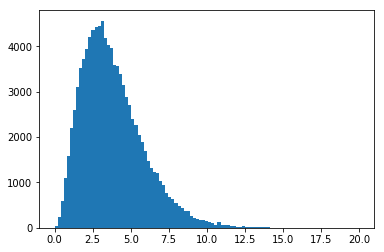

In [37]:
plt.hist(sample_x, bins = np.linspace(0, 20, 100));

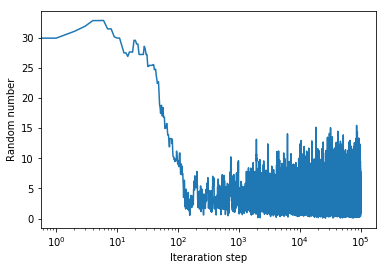

In [38]:
#plt.hist(sample_x, bins=np.linspace(0, 20, 10));
plt.plot(i_list, sample_x)
plt.xlabel('Iteraration step')
plt.ylabel('Random number')
plt.xscale('log')

In [ ]:
y